### Problem 1: Ridge Regression and Co-linearity.

1. Download and make sure you can run through and understand the Jupyter notebook on Ridge Regression and Colinearity we saw in class.

2. What is the test error of the “zero-variance” solution, namely, the all-zeros solution?

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [36]:
p = 5; n = 500
X = np.random.randn(n,p)
c = np.dot(X[:,0:p-1],[2,3,-1,0.5]) + np.random.randn(1,n)/1000;
X[:,p-1] = c
beta = np.array([1,1,1,1,0])
sigma = 0.3333
y = np.dot(X,beta) + sigma*np.random.randn(n)

In [27]:
#Now let's also generate a test data set
n1 = 500
X_test = np.random.randn(n1,p)
c_test = np.dot(X_test[:,0:p-1],[2,3,0,0.5]) + np.random.randn(1,n1)/1000;
X_test[:,p-1] = c_test
y_test = np.dot(X_test,beta) + sigma*np.random.randn(n1)

In [28]:
Z = np.dot(X.T,X)
beta_hat = np.dot(np.dot(np.linalg.inv(Z),X.T),y.T)
print(beta_hat)

[ 24.75627957  36.60533979 -10.8640155    6.93987896 -11.86665222]


In [29]:
# Now let's compute the test error of OLS.
np.linalg.norm(np.dot(X_test,beta_hat) - y_test)

269.0985865487842

In [39]:
beta_hat_zero = np.array([0,0,0,0,0])
# For comparison, the test error of zero varience is:
np.linalg.norm(np.dot(X_test,beta_hat_zero) - y_test)

45.153089021645506

3. The least-squares solution does not seem to do too well, because it has so much variance. Still, it is unbiased. Show this empirically: generate many copies of the data, and for each one, obtain the least-squares solution. Average these, to show that while each run produces a beta hat that is very different, their average begins to look more and more like the true beta.

In [52]:
# for i = 100
beta_hat_all_100 = []
X_combine_100 = []
y_combine_100 = []

for i in range(100): 
    p = 5; n = 500
    X = np.random.randn(n,p)
    c = np.dot(X[:,0:p-1],[2,3,-1,0.5]) + np.random.randn(1,n)/1000;
    X[:,p-1] = c
    beta = np.array([1,1,1,1,0])
    sigma = 0.3333
    y = np.dot(X,beta) + sigma*np.random.randn(n)
    Z = np.dot(X.T,X)
    beta_hat = np.dot(np.dot(np.linalg.inv(Z),X.T),y.T)
    beta_hat_all_100.append(beta_hat)
    
    if len(X_combine_100) == 0:
        X_combine_100 = X
    else:
        X_combine_100 = np.concatenate((X_combine_100,X), axis=0)
    
    if len(y_combine_100) == 0:
        y_combine_100 = y
    else:
        y_combine_100 = np.concatenate((y_combine_100,y), axis=0)
    
sum(beta_hat_all_100)/100

array([-0.87955847, -1.81592578,  1.93909899,  0.53344582,  0.93913983])

In [54]:
#for i = 1000
beta_hat_all_1000 = []
X_combine_1000 = []
y_combine_1000 = []

for i in range(1000): 
    p = 5; n = 500
    X = np.random.randn(n,p)
    c = np.dot(X[:,0:p-1],[2,3,-1,0.5]) + np.random.randn(1,n)/1000;
    X[:,p-1] = c
    beta = np.array([1,1,1,1,0])
    sigma = 0.3333
    y = np.dot(X,beta) + sigma*np.random.randn(n)
    Z = np.dot(X.T,X)
    beta_hat = np.dot(np.dot(np.linalg.inv(Z),X.T),y.T)
    beta_hat_all_1000.append(beta_hat)
    
    if len(X_combine_1000) == 0:
        X_combine_1000 = X
    else:
        X_combine_1000 = np.concatenate((X_combine_1000,X), axis=0)
    
    if len(y_combine_1000) == 0:
        y_combine_1000 = y
    else:
        y_combine_1000 = np.concatenate((y_combine_1000,y), axis=0)

sum(beta_hat_all_1000)/1000

array([0.61836269, 0.42691885, 1.19075069, 0.90487683, 0.19091912])

In [68]:
#for i = 10000
beta_hat_all_10000 = []
X_combine_10000 = []
y_combine_10000 = []

for i in range(10000): 
    p = 5; n = 500
    X = np.random.randn(n,p)
    c = np.dot(X[:,0:p-1],[2,3,-1,0.5]) + np.random.randn(1,n)/1000;
    X[:,p-1] = c
    beta = np.array([1,1,1,1,0])
    sigma = 0.3333
    y = np.dot(X,beta) + sigma*np.random.randn(n)
    Z = np.dot(X.T,X)
    beta_hat = np.dot(np.dot(np.linalg.inv(Z),X.T),y.T)
    beta_hat_all_10000.append(beta_hat)
    
    if len(X_combine_10000) == 0:
        X_combine_10000 = X
    else:
        X_combine_10000 = np.concatenate((X_combine_10000,X), axis=0)
    
    if len(y_combine_10000) == 0:
        y_combine_10000 = y
    else:
        y_combine_10000 = np.concatenate((y_combine_10000,y), axis=0)

sum(beta_hat_all_10000)/10000

array([0.75066031, 0.62615061, 1.12476281, 0.93750217, 0.12461014])

4. Alternatively, if one had access to lots of data, instead of computing the least-square solution over smaller batches and then averaging these solutions as in the previous part of the problem, an approach is to run a single least-squares regression over all the data. Which approach do you think is better? Can you support your conclusion with experiments?

In [69]:
Z_combine_100 = np.dot(X_combine_100.T,X_combine_100)
beta_hat_combine_100 = np.dot(np.dot(np.linalg.inv(Z_combine_100),X_combine_100.T),y_combine_100.T)
print(beta_hat_combine_100)

[-0.80140425 -1.69870538  1.89987309  0.5532163   0.89997765]


In [70]:
Z_combine_1000 = np.dot(X_combine_1000.T,X_combine_1000)
beta_hat_combine_1000 = np.dot(np.dot(np.linalg.inv(Z_combine_1000),X_combine_1000.T),y_combine_1000.T)
print(beta_hat_combine_1000)

[0.67752647 0.51578142 1.16121783 0.91965817 0.16134813]


In [71]:
Z_combine_10000 = np.dot(X_combine_10000.T,X_combine_10000)
beta_hat_combine_10000 = np.dot(np.dot(np.linalg.inv(Z_combine_10000),X_combine_10000.T),y_combine_10000.T)
print(beta_hat_combine_10000)

[0.70383565 0.5558834  1.14818883 0.92581481 0.14803152]


### Problem 2: Starting in Kaggle.

1. Let’s start with our first Kaggle submission in a playground regression competition. Make an account to Kaggle and find https://www.kaggle.com/c/house-prices-advanced-regression-techniques/

2. Follow the data preprocessing steps from https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models. Then run a ridge regression using α = 0.1. Make a submission of this prediction, what is the RMSE you get?
(Hint: remember to exponentiate np.expm1(ypred) your predictions).

In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [228]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [229]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [230]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1259dd748>,
      dtype=object)

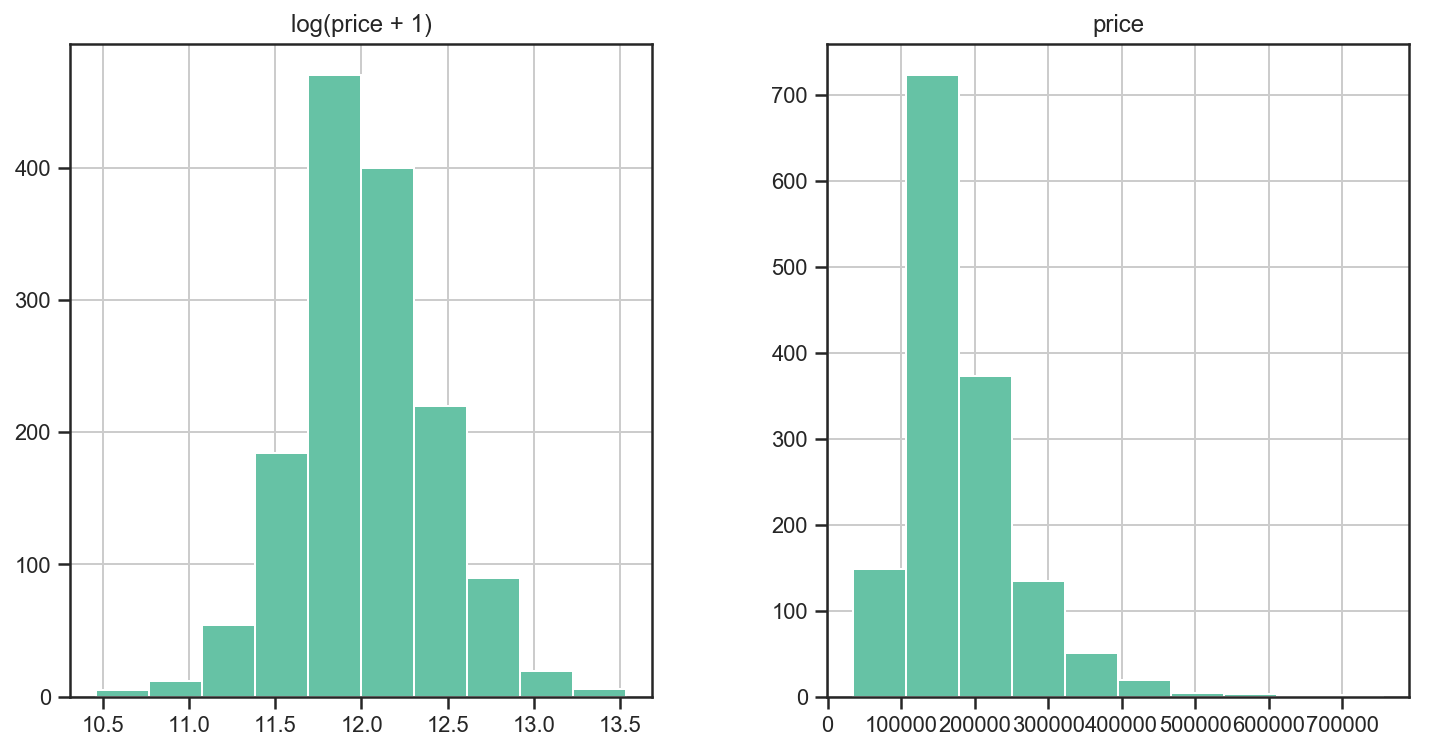

In [231]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [232]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

/Users/apple/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log1p
  # This is added back by InteractiveShellApp.init_path()


In [233]:
all_data = pd.get_dummies(all_data)

In [234]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [235]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [247]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [245]:
model_ridge = Ridge()

In [255]:
alphas = 0.1
cv_ridge = sum(rmse_cv(Ridge(alphas)))/5
print(cv_ridge)

0.13777538277187865


In [259]:
ridge_result = Ridge(alpha = alpha).fit(X_train,y)
predict = np.expm1(ridge_result.predict(X_test))
print(predict)

[121461.41516215 158795.7093931  187717.50697394 ... 176617.68769562
 121470.76255537 219175.18004748]


In [ ]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)

3. Compare a ridge regression and a lasso regression model. Optimize the alphas using cross validation. What is the best score you can get from a single ridge regression model and from a single lasso model?

In [217]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

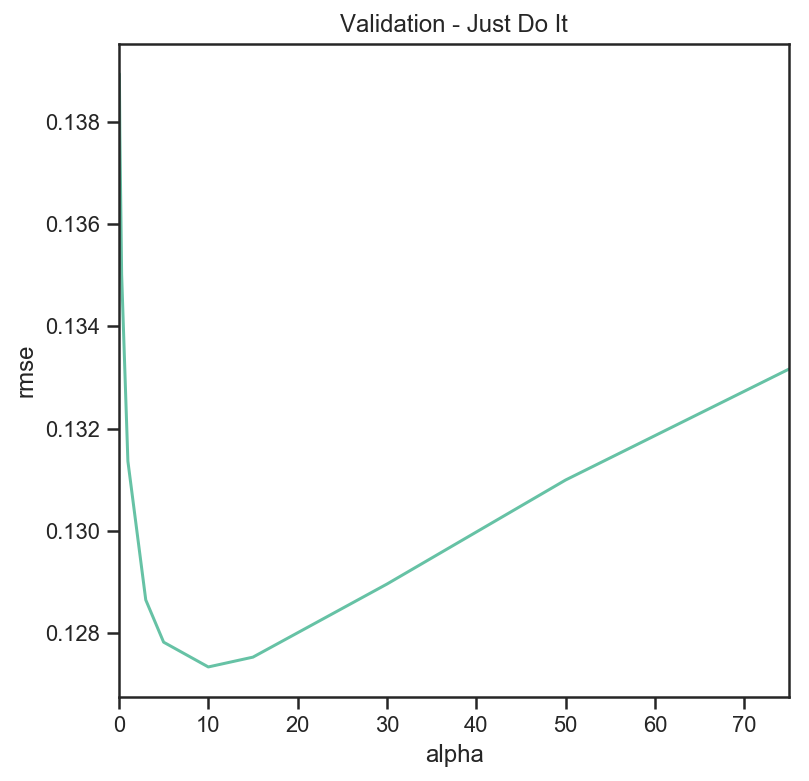

In [218]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [219]:
cv_ridge.min()

0.12733734668670763

In [223]:
alpha = 0.12733734668670763
ridge = Ridge(alpha = alpha)
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.fit(X_train, y_train).predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)
#print(lasso)
print("R^2 on test data : %f" % r2_score_ridge)

NameError: name 'y_train' is not defined

In [193]:
model_lasso =LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [194]:
rmse_cv(model_lasso).mean()

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warn

0.12314421090977427

In [195]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [196]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 110 variables and eliminated the other 178 variables


In [198]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

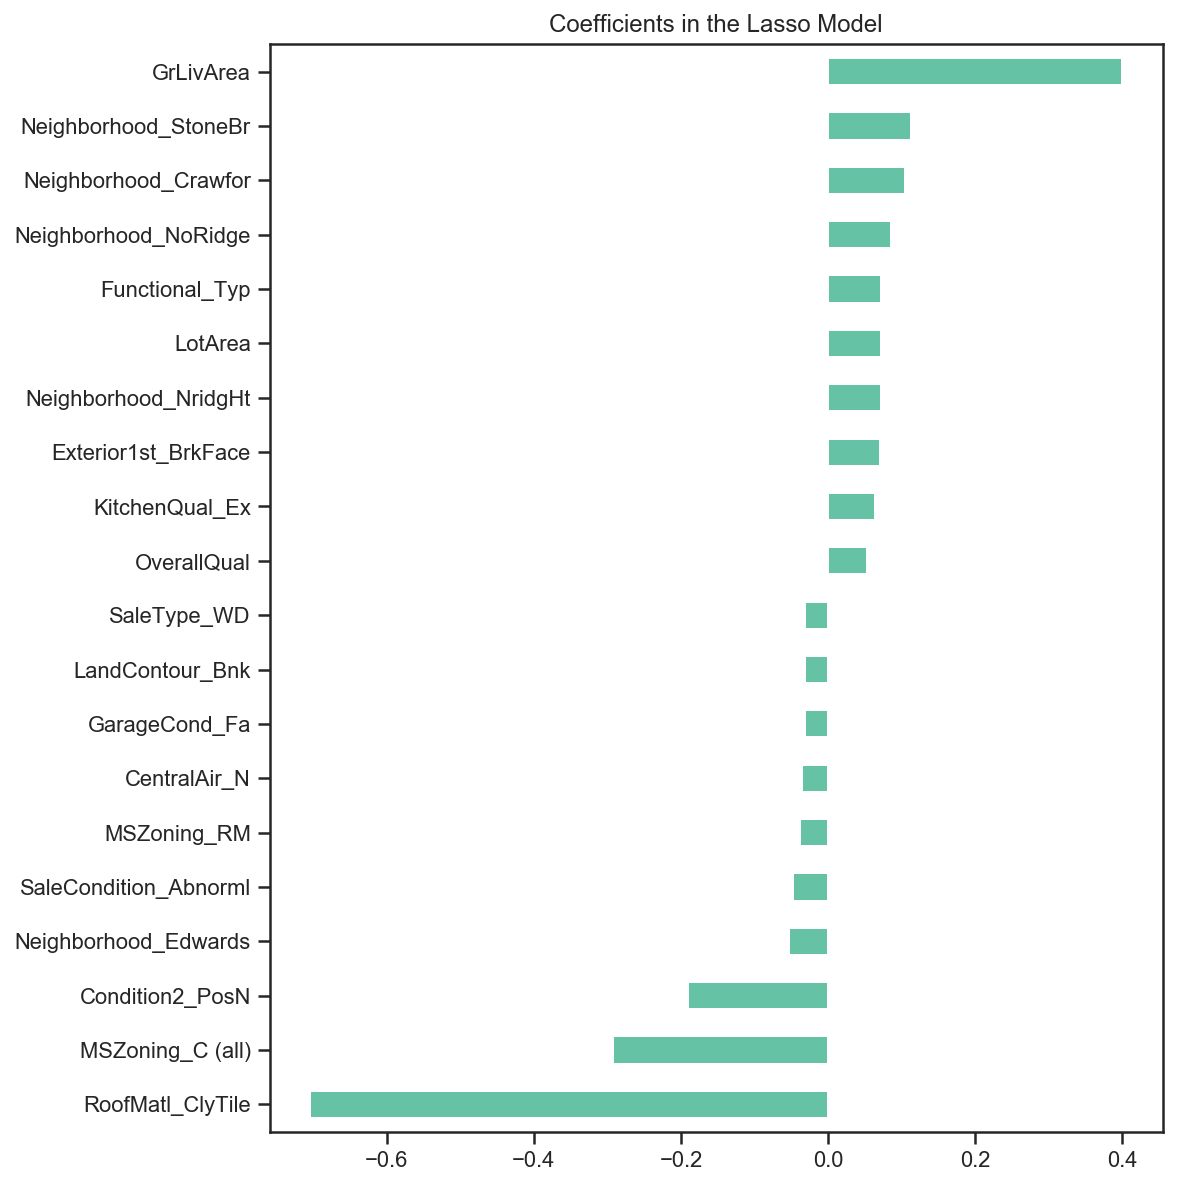

In [199]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


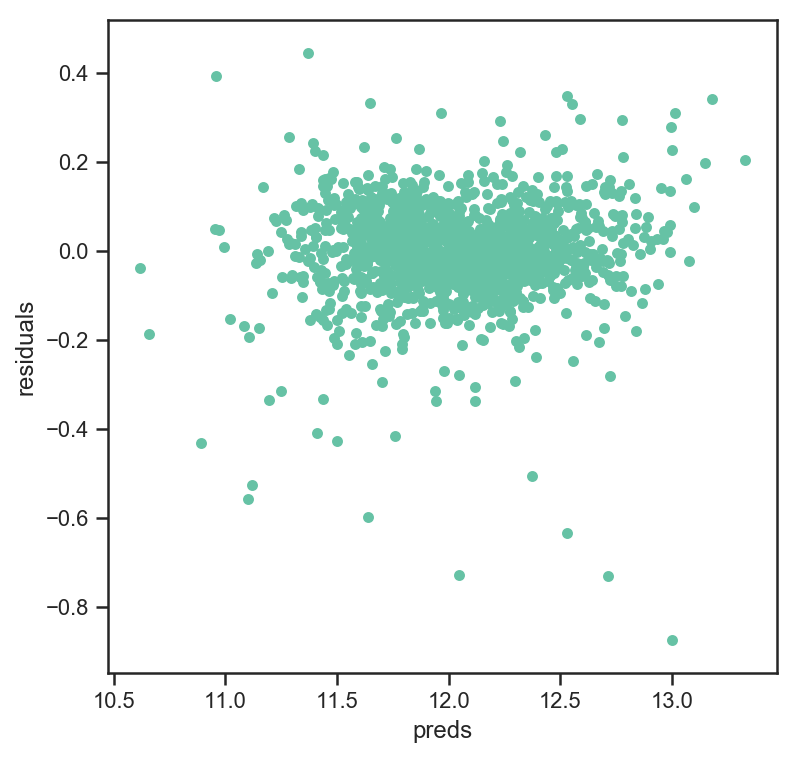

In [200]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [203]:
import xgboost as xgb

In [204]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

/Users/apple/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/apple/miniconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


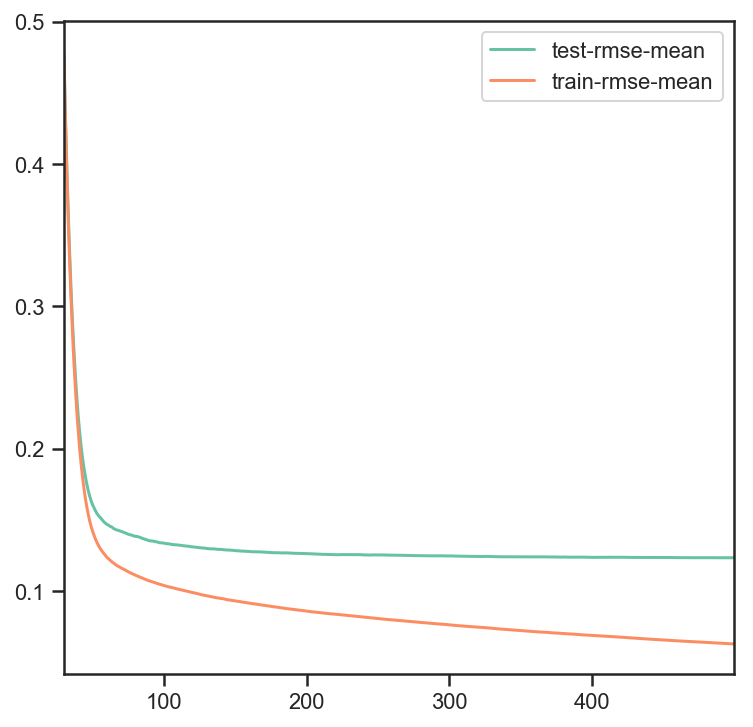

In [205]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [206]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

[23:51:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [207]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


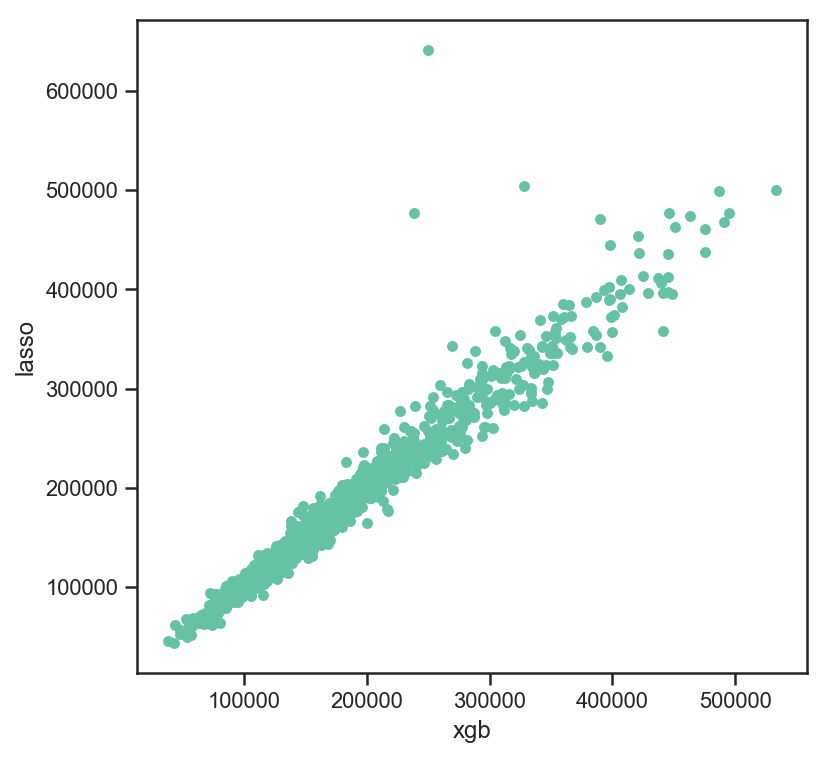

In [208]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [209]:
preds = 0.7*lasso_preds + 0.3*xgb_preds

In [210]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)